# Suicide Detection Project

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('file1.csv')

## Load The Dataset

In [62]:
data.head()

,Unnamed: 0,text,class
0,74414,dont know7 month self harm free urg get strong...,suicide
1,149516,start becom rich start compani becom 16 afford...,non-suicide
2,12484,poem haiku umegamedev hi hello hello stop fuck...,non-suicide
3,14043,ive honestli got idea anymoreit feel everyon f...,suicide
4,30673,ever cri like think unfair life cri cant cri e...,non-suicide


## Exploratory Data Analysis

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   text        9999 non-null   object
 2   class       10000 non-null  object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


### The 'Unnamed: 0' column is not needed for our models predictions so we can drop it.

In [64]:
data = data.drop('Unnamed: 0', axis= 1)

### Identify and Drop rows with missing values

In [65]:
data.isna().sum()

text     1
class    0
dtype: int64

In [66]:
data.dropna(subset=['text'], inplace=True)

In [67]:
data.isna().sum()

text     0
class    0
dtype: int64

### identify and Drop Duplicate Rows

In [68]:
data.duplicated().sum()

1

In [69]:
data.drop_duplicates(inplace=True)

In [70]:
data.duplicated().sum()

0

### Class count distribution

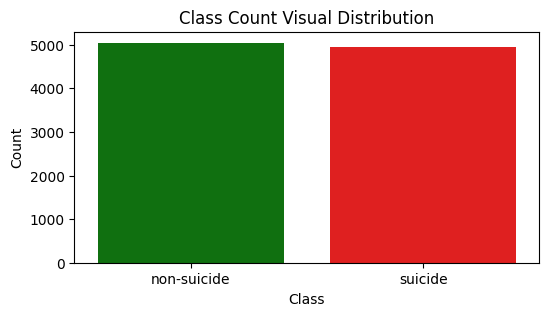

In [94]:
class_count = data['class'].value_counts()
class_data = pd.DataFrame({'Class':class_count.index, 'Count':class_count.values})

plt.figure(figsize=(6,3))
sns.barplot(x='Class', y='Count', data=class_data, palette=['green', 'red'], hue='Class')
plt.title('Class Count Visual Distribution')
plt.show()

In [93]:
class_count = data['class'].value_counts()
print(class_count)

class
non-suicide    5047
suicide        4951
Name: count, dtype: int64


## Import necessary libraries

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

### Split data into training and testing sets

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], test_size=0.2, random_state=42)

### Vectorize the text data using TF-IDF

In [73]:
vectorizer = TfidfVectorizer(max_features=5000) 
X_train_vectorized = vectorizer.fit_transform(X_train.astype('U'))  # Convert to Unicode strings
X_test_vectorized = vectorizer.transform(X_test.astype('U'))  

## Logistic Regression Prediction:

In [74]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 non-suicide       0.90      0.93      0.91      1019
     suicide       0.93      0.89      0.91       981

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



## Decision Tree Classifier:

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
model = DecisionTreeClassifier()
model.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 non-suicide       0.82      0.84      0.83      1019
     suicide       0.83      0.81      0.82       981

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



## Random Forest Classifier:

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 non-suicide       0.89      0.89      0.89      1019
     suicide       0.88      0.88      0.88       981

    accuracy                           0.89      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.89      0.89      0.89      2000



## Gradient Boosting Classifier:

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
model = GradientBoostingClassifier()
model.fit(X_train_vectorized, y_train)

# Evaluate the model
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

 non-suicide       0.86      0.91      0.88      1019
     suicide       0.90      0.84      0.87       981

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



## Suprisingly the Logistic Regression Model outperformed all our more advanced models.